<a href="https://colab.research.google.com/github/DeathSlayer1707/random_gigs/blob/main/Raj_classificationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/meltpool_dataset.csv")
print(df.head())

   Laser Power (W)  Scan Speed (mm/s)  Beam Diameter (mm)  \
0       249.816047          96.283232            1.023411   
1       480.285723         185.475237            0.993958   
2       392.797577         268.236459            2.312509   
3       339.463394         233.056222            0.999092   
4       162.407456         251.640287            1.043899   

   Cooling Rate (°C/s)  Shielding Gas Composition (%)  \
0          1172.702994                      57.199588   
1          1296.681397                      80.543233   
2           750.467899                      76.016093   
3          1124.874100                      15.389990   
4          1071.745983                      14.924947   

   Melt Pool Intensity (mm)  Melt Pool Width (mm)     Defect Type  
0                  0.651090              1.366863  Uneven Surface  
1                  0.762810              0.510295        Porosity  
2                  1.296366              1.770310  Uneven Surface  
3                 

In [4]:
X = df.drop("Defect Type",axis = 1)
y = df["Defect Type"]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y_categorical)
X_train, X_test, y_train_categorical, y_test_categorical = train_test_split(X, y_categorical, test_size=0.33, random_state=42,stratify=y_categorical)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout,Flatten,concatenate
# model = Sequential([
#     Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(y_categorical.shape[1], activation='softmax')
# ])
input_layer = Input(shape=(X_train_scaled.shape[1],))
# flatten = Flatten(input_shape = (28,28))(input_layer) # Remove flatten as data is not image
hidden1 = Dense(128,activation="relu")(input_layer)
hidden2 = Dense(256,activation="relu")(input_layer)
hidden11 = Dense(64,activation="relu")(hidden1)
merge = concatenate([hidden11,hidden2])
output_layer = Dense(y_categorical.shape[1],activation="softmax")(merge)
model = Model(inputs=input_layer,outputs=output_layer)

In [16]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │      1,024 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      8,256 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 256)       │      2,048 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 320)       │          0 │ dense_18[0][0],   │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 4)         │      1,284 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,612 (49.27 KB)

 Trainable params: 12,612 (49.27 KB)

 Non-trainable params: 0 (0.00 B)

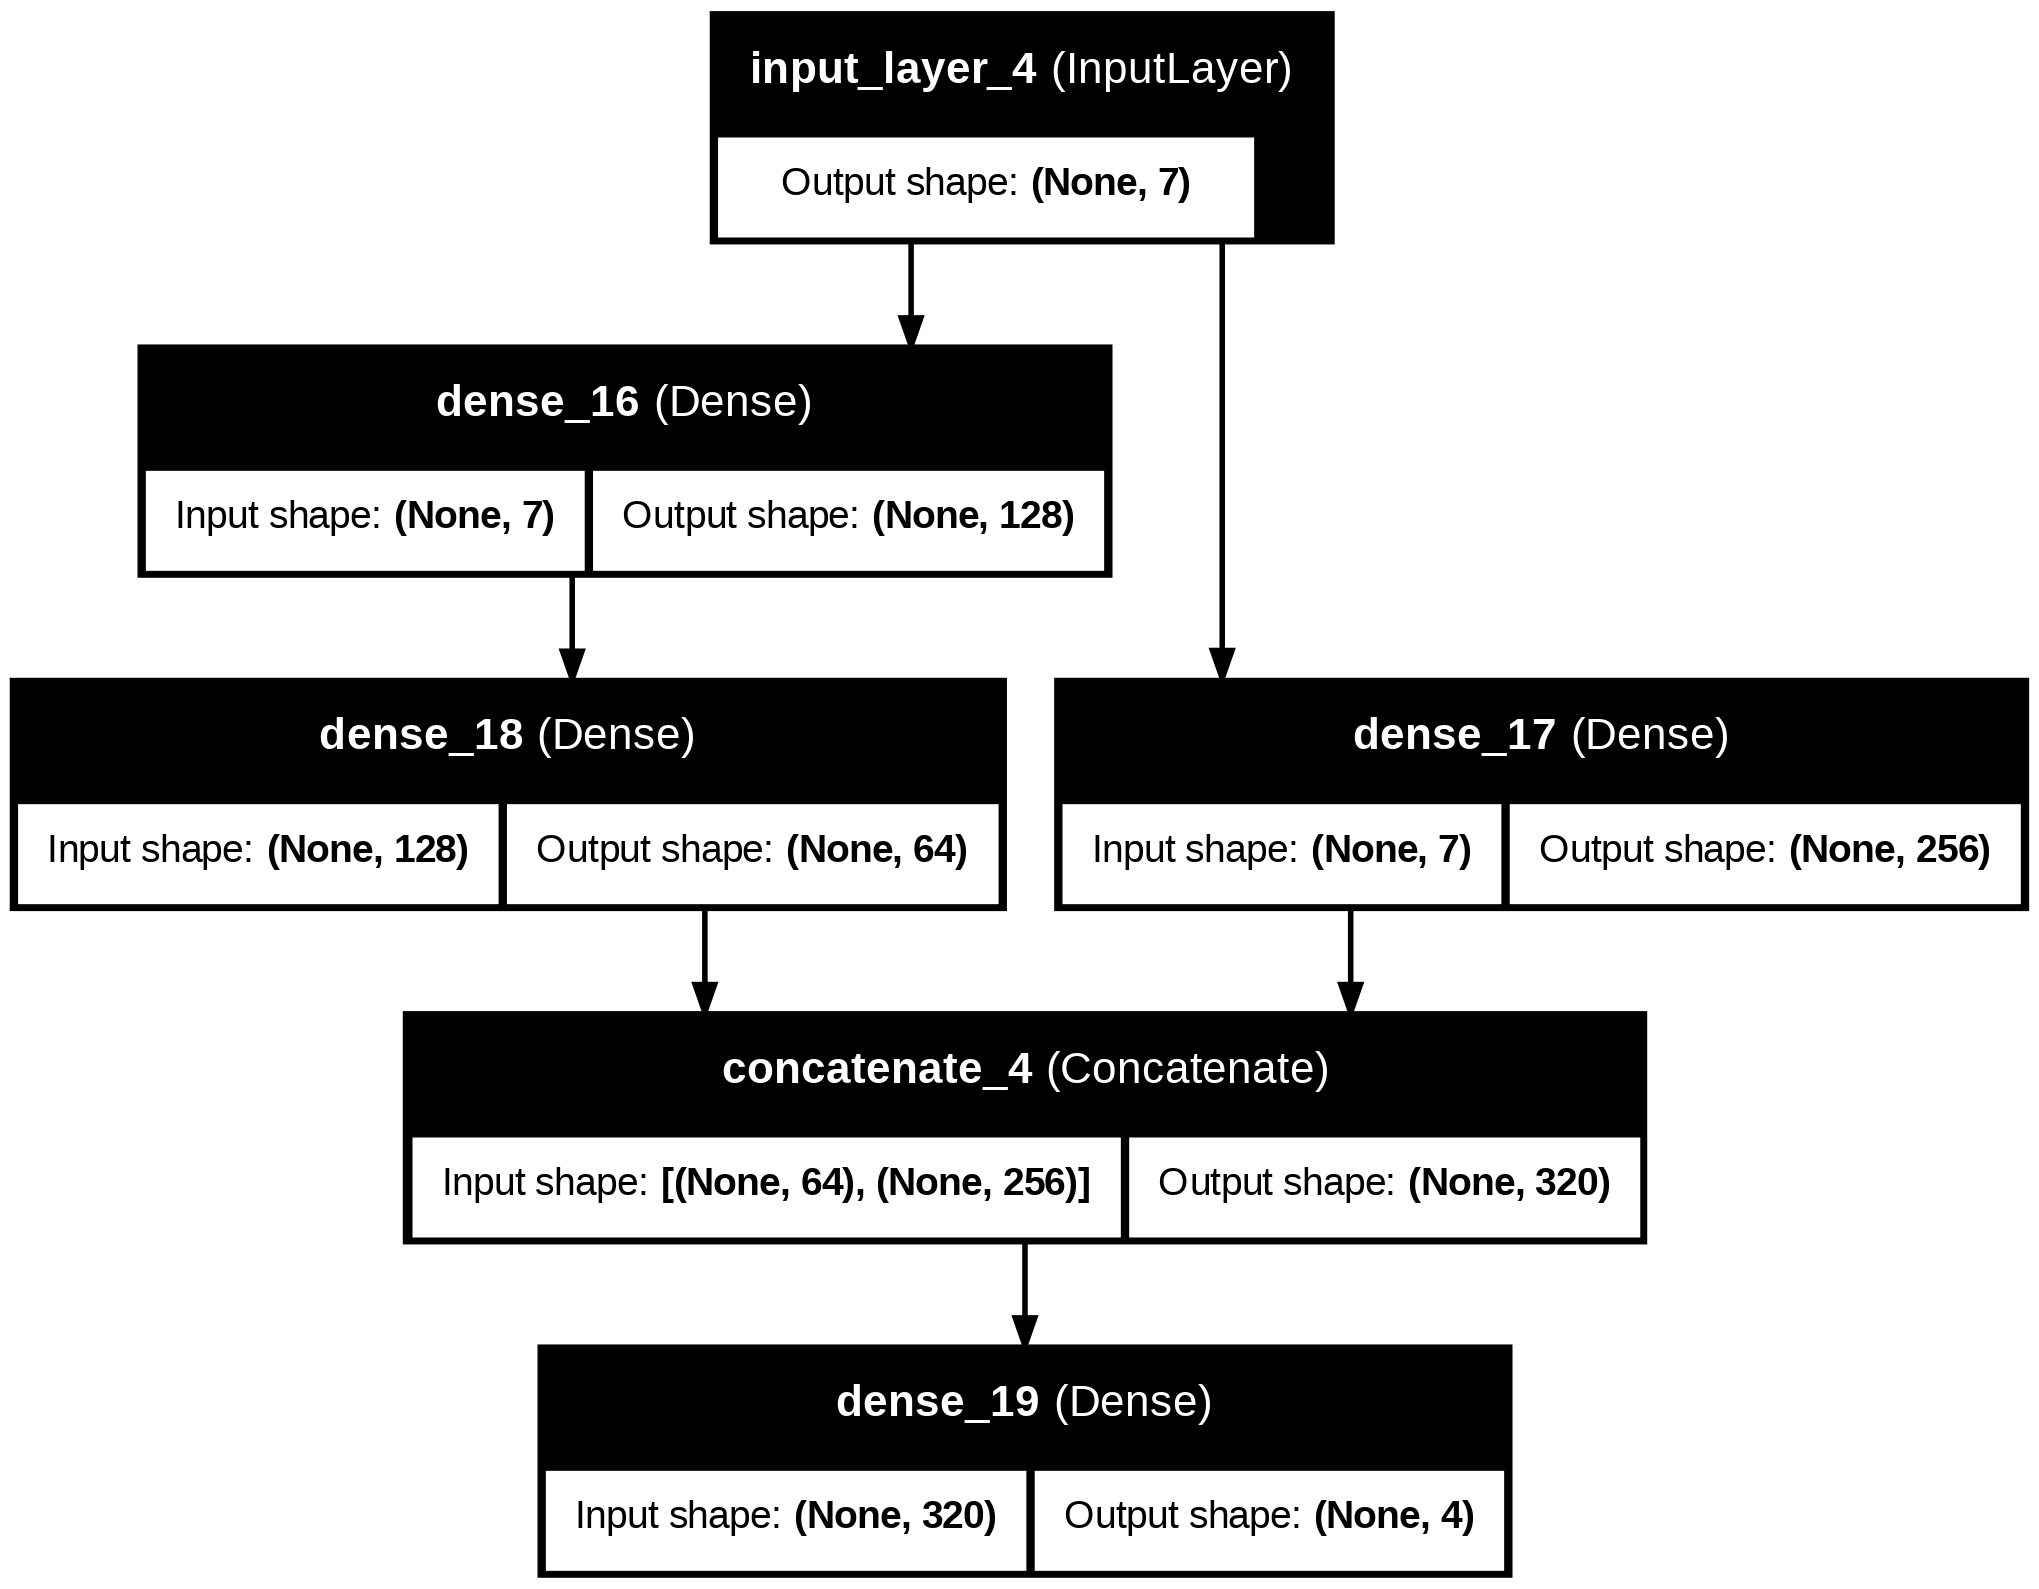

In [17]:
from keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True)

In [18]:
from sklearn.metrics import classification_report, accuracy_score
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [38]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32,callbacks= early_stop, validation_split=0.15,)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9407 - loss: 0.3720 - val_accuracy: 0.4158 - val_loss: 1.8616
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9434 - loss: 0.3770 - val_accuracy: 0.4059 - val_loss: 1.9024
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9459 - loss: 0.3632 - val_accuracy: 0.4059 - val_loss: 1.9374
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9487 - loss: 0.3628 - val_accuracy: 0.4059 - val_loss: 1.9597
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9258 - loss: 0.3721 - val_accuracy: 0.3960 - val_loss: 1.9716
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9583 - loss: 0.3406 - val_accuracy: 0.3861 - val_loss: 1.9660
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9493 - loss: 0.3309 - val_accuracy: 0.3861 - val_loss: 1.9537
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9557 - loss: 0.3140 - val_accuracy: 0.3762 - 

Text(0, 0.5, 'Accuracy')

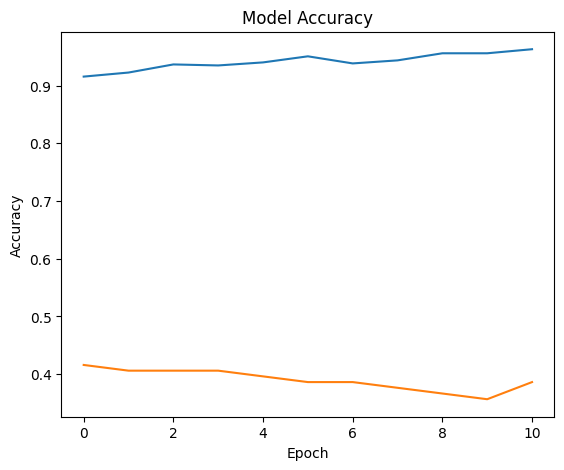

In [39]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


In [40]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled).argmax(axis=1)
y_true = y_test_categorical.argmax(axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("🔹 Accuracy:", accuracy)
print("🔹 Classification Report:\n", classification_report(y_true, y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
🔹 Accuracy: 0.24242424242424243
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.21      0.22        77
           1       0.30      0.41      0.35        91
           2       0.21      0.16      0.18        85
           3       0.19      0.17      0.18        77

    accuracy                           0.24       330
   macro avg       0.23      0.24      0.23       330
weighted avg       0.23      0.24      0.23       330



# Task
Explain the error in the selected code, fix it if possible, and provide suggestions on how to increase validation accuracy.

## Review and adjust model architecture

### Subtask:
The current model might be too complex for the dataset, leading to overfitting. Consider simplifying the model by reducing the number of layers or neurons, or by adjusting the activation functions.


**Reasoning**:
The current model has a complex architecture with multiple layers and a concatenate layer. To simplify the model and potentially reduce overfitting, I will redefine the model with a simpler sequential structure with fewer layers and neurons. I will keep the `relu` activation for hidden layers and `softmax` for the output layer as they are generally appropriate for multi-class classification.



In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,724 (10.64 KB)

 Trainable params: 2,724 (10.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile()
model.fit(X)